# conf-2 of the NHRF data pipeline
In this notebook we analyze the results from run1, 2, 3, 4 of the `conf-2` configuration of the NHRF data pipeline

In [87]:
import pandas as pd
from analysis_functions import get_time_periods, get_power_data, divide_power_data_into_step_periods, compute_relative_energy_usage
from analysis_functions import plot_energy_usage, plot_multiple_datasets

In [111]:
base_path = "./data_carbontracker/conf-2"
corresponding_datasets = {
    "run1": {
        "simpipe": f"{base_path}/run1.dat", 
        "tapo": f'{base_path}/power-run1.xls',
        "tapo-filtered": f'{base_path}/power-run1-filtered.xls',
        "start_time_baseline": '2025-08-31 03:00:00', 
        "end_time_baseline": '2025-08-31 14:00:00',
        "start_time_pipeline": '2025-08-31 13:09:34',
        "end_time_pipeline": '2025-08-31 16:29:43'},
    "run2": {
        "simpipe": f"{base_path}/run2.dat", 
        "tapo": f'{base_path}/power-run2.xls',
        "tapo-filtered": f'{base_path}/power-run2-filtered.xls',
        "start_time_baseline": '2025-08-31 09:00:00', 
        "end_time_baseline": '2025-08-31 15:00:00',
        "start_time_pipeline": '2025-08-31 17:43:17',
        "end_time_pipeline": '2025-08-31 21:03:26'},
    "run3": {
        "simpipe": f"{base_path}/run3.dat", 
        "tapo": f'{base_path}/power-run3.xls',
        "tapo-filtered": f'{base_path}/power-run3-filtered.xls',
        "start_time_baseline": '2025-09-02 03:00:00', 
        "end_time_baseline": '2025-09-02 07:00:00',
        "start_time_pipeline": '2025-09-02 14:54:55',
        "end_time_pipeline": '2025-09-02 18:15:04'},
    "run4": {
        "simpipe": f"{base_path}/run4.dat", 
        "tapo": f'{base_path}/power-run4.xls', 
        "tapo-filtered": f'{base_path}/power-run4-filtered.xls',
        "start_time_baseline": '2025-09-08 15:00:00', 
        "end_time_baseline": '2025-09-09 05:00:00',
        "start_time_pipeline": '2025-09-09 06:12:51',
        "end_time_pipeline": '2025-09-09 09:36:31'},
}
# corresponding datasets tuples contain the following information: 
# (carbontracker_simpipe_data, tapo_data, start_time_baseline, end_time_baseline, end_time_pipeline)

In [112]:
# runNr = 1, 2, 3, 4 // corresponds to 0, 1, 2, 3 in the corresponding_datasets

#runNr = "run1"
#runNr = "run2"
#runNr = "run3"
runNr = "run4"
path = corresponding_datasets[runNr]["simpipe"]
carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)

/var/folders/9x/df97rq2j35gg_bpq8dzj7wz40000gn/T/ipykernel_88108/3193625479.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)


In [113]:
carbontracker_simpipe_data

,step,start,stop,duration,co2,energy,status,output
0,create-fasta-index,2025-09-09T06:12:51Z,2025-09-09T06:13:43Z,52,0.001,0.000047,Succeeded,fasta-index*
1,trimming,2025-09-09T06:13:53Z,2025-09-09T06:38:07Z,1454,1.306,0.043423,Succeeded,trimming-results*
2,alignment-bwa,2025-09-09T06:38:17Z,2025-09-09T09:07:39Z,8962,9.076,0.301742,Succeeded,alignment-results*
3,mark-duplicates,2025-09-09T09:07:49Z,2025-09-09T09:32:14Z,1465,0.662,0.022010,Succeeded,mark-duplicates-results*
4,create-fasta-dict,2025-09-09T09:32:24Z,2025-09-09T09:33:31Z,67,0.008,0.000264,Succeeded,fasta-dict*
5,base-quality-score,2025-09-09T09:33:41Z,2025-09-09T09:36:31Z,170,0.009,0.000307,Succeeded,final-results*


In [ ]:
power_data = get_power_data(data_path=corresponding_datasets[runNr]["tapo"]) # get tapo power data
#power_data = get_power_data(data_path=corresponding_datasets[runNr]["tapo-filtered"]) # get tapo power data filtered to only contain the power surge and the baseline

# NB! Many of the datasets have power surges that are too tightly adjacent.

In [115]:
power_data.describe()

,Date,Power(W),Energy(kWh)
count,288,288.000000,288.000000
mean,2025-09-09 01:22:30,216.645833,0.018054
min,2025-09-08 13:25:00,198.000000,0.016500
25%,2025-09-08 19:23:45,201.000000,0.016750
50%,2025-09-09 01:22:30,203.000000,0.016917
75%,2025-09-09 07:21:15,206.000000,0.017167
max,2025-09-09 13:20:00,347.000000,0.028917
std,NaN,38.024743,0.003169


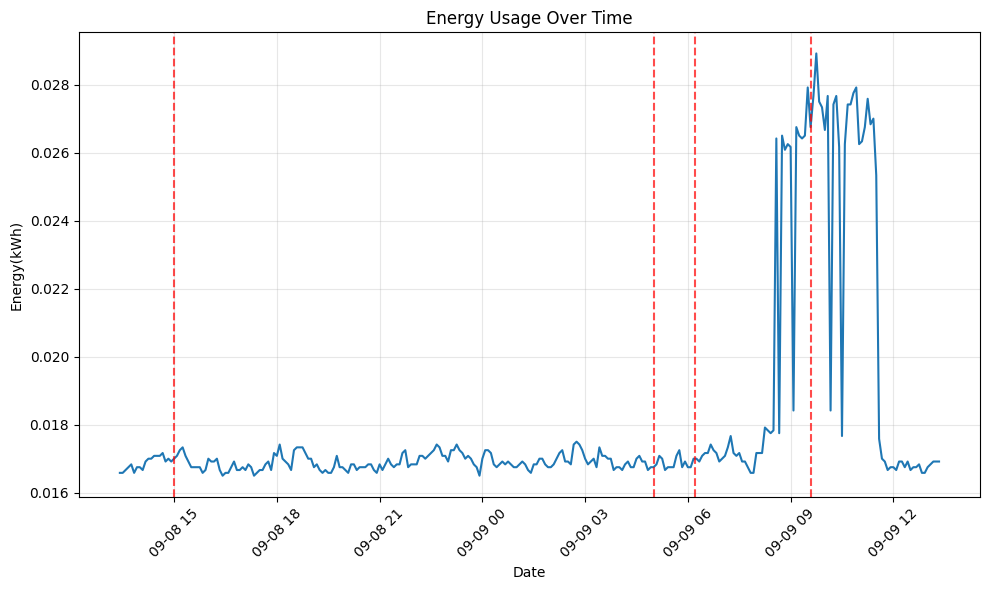

In [116]:
#raw_power_data.plot(x='Date', y='Energy(kWh)', title='Energy Usage Over Time')
#start_time = corresponding_datasets[runNr -1][2]
title = "Energy Usage Over Time"
xcol="Date"
ycol="Energy(kWh)"

start_time_baseline = corresponding_datasets[runNr]["start_time_baseline"]
end_time_baseline = corresponding_datasets[runNr]["end_time_baseline"]
start_time_pipeline = corresponding_datasets[runNr]["start_time_pipeline"]
end_time_pipeline = corresponding_datasets[runNr]["end_time_pipeline"]
timestamps = [start_time_baseline, end_time_baseline, start_time_pipeline, end_time_pipeline]


# run1 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None, 
#    timestamps=timestamps)

# run2 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None,
#    timestamps=timestamps)

# run 3 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None,
#    timestamps=timestamps)

# run 4 // 
plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=None, end=None,
    timestamps=timestamps)

In [76]:
time_periods = get_time_periods(carbontracker_simpipe_data, start_time_baseline, end_time_baseline)

    get_time_periods -- start and end times present. Assuming baseline period.
     appending baseline period
    get_time_periods -- extracted time periods:
      - baseline: 2025-09-08 15:00:00 to 2025-09-09 05:00:00
      - create-fasta-index: 2025-09-09 06:12:51 to 2025-09-09 06:13:43
      - trimming: 2025-09-09 06:13:53 to 2025-09-09 06:38:07
      - alignment-bwa: 2025-09-09 06:38:17 to 2025-09-09 09:07:39
      - mark-duplicates: 2025-09-09 09:07:49 to 2025-09-09 09:32:14
      - create-fasta-dict: 2025-09-09 09:32:24 to 2025-09-09 09:33:31
      - base-quality-score: 2025-09-09 09:33:41 to 2025-09-09 09:36:31


In [77]:
time_periods

[('baseline', '2025-09-08 15:00:00', '2025-09-09 05:00:00'),
 ('create-fasta-index', '2025-09-09 06:12:51', '2025-09-09 06:13:43'),
 ('trimming', '2025-09-09 06:13:53', '2025-09-09 06:38:07'),
 ('alignment-bwa', '2025-09-09 06:38:17', '2025-09-09 09:07:39'),
 ('mark-duplicates', '2025-09-09 09:07:49', '2025-09-09 09:32:14'),
 ('create-fasta-dict', '2025-09-09 09:32:24', '2025-09-09 09:33:31'),
 ('base-quality-score', '2025-09-09 09:33:41', '2025-09-09 09:36:31')]

In [78]:
power_data_segments = divide_power_data_into_step_periods(time_periods, power_data)


     divide_power_data_into_step_periods...
        Processing baseline...
            start: 2025-09-08 15:00:00, end: 2025-09-09 05:00:00
        Setting baseline energy and power values from baseline step.
        Processing create-fasta-index...
            start: 2025-09-09 06:12:51, end: 2025-09-09 06:13:43
No data found between 2025-09-09 06:12:51 and 2025-09-09 06:13:43
        Warning! No data for period: create-fasta-index
        Processing trimming...
            start: 2025-09-09 06:13:53, end: 2025-09-09 06:38:07
        Processing alignment-bwa...
            start: 2025-09-09 06:38:17, end: 2025-09-09 09:07:39
        Processing mark-duplicates...
            start: 2025-09-09 09:07:49, end: 2025-09-09 09:32:14
        Processing create-fasta-dict...
            start: 2025-09-09 09:32:24, end: 2025-09-09 09:33:31
No data found between 2025-09-09 09:32:24 and 2025-09-09 09:33:31
        Warning! No data for period: create-fasta-dict
        Processing base-quality-scor

/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:105: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '223.63' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stats['filtered_data'].loc[stats['filtered_data']['Date'].idxmax(), 'Power(W)'] *= fraction


In [79]:
power_data_segments

[                   Date  Power(W)  Energy(kWh)
 20  2025-09-08 15:00:00       204     0.017000
 21  2025-09-08 15:05:00       205     0.017083
 22  2025-09-08 15:10:00       207     0.017250
 23  2025-09-08 15:15:00       208     0.017333
 24  2025-09-08 15:20:00       205     0.017083
 ..                  ...       ...          ...
 184 2025-09-09 04:40:00       203     0.016917
 185 2025-09-09 04:45:00       203     0.016917
 186 2025-09-09 04:50:00       200     0.016667
 187 2025-09-09 04:55:00       201     0.016750
 188 2025-09-09 05:00:00       201     0.016750
 
 [169 rows x 3 columns],
 Empty DataFrame
 Columns: []
 Index: [],
                    Date  Power(W)  Energy(kWh)
 203 2025-09-09 06:15:00       204     0.017000
 204 2025-09-09 06:20:00       203     0.016917
 205 2025-09-09 06:25:00       205     0.017083
 206 2025-09-09 06:30:00       206     0.017167
 207 2025-09-09 06:35:00       206     0.017167,
                    Date  Power(W)  Energy(kWh)
 208 2025-09-09 06

In [80]:
#plot_energy_usage_overlay_multiple_datasets(power_data, power_data_segments, time_periods, start_time_baseline, end_time)

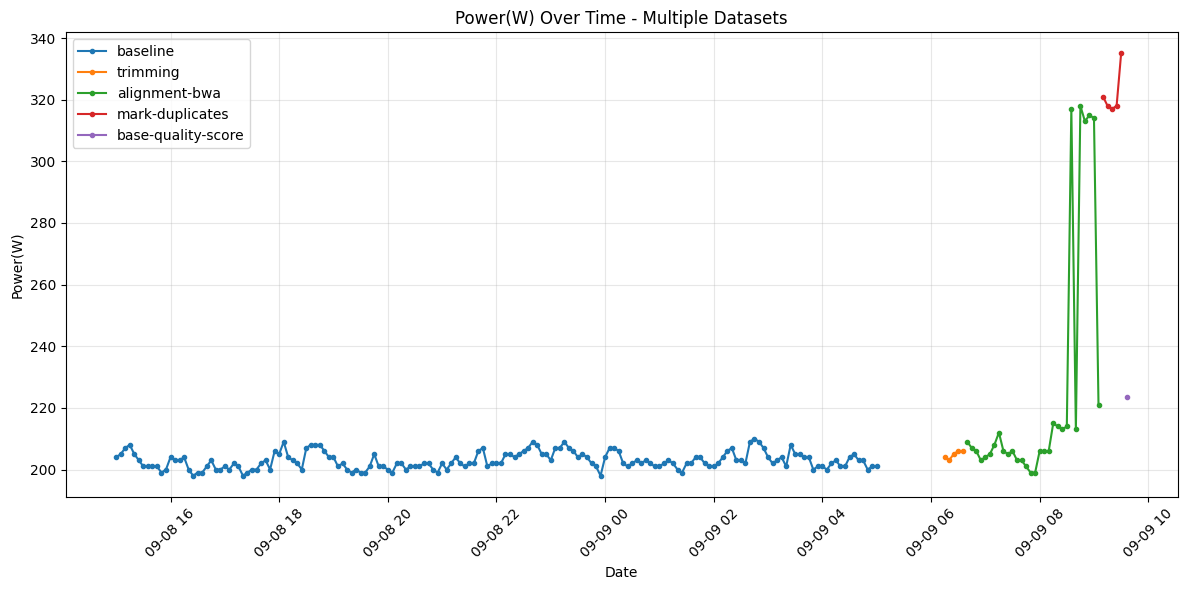

In [81]:
plot_multiple_datasets(power_data_segments, time_periods)

The BSQR step is not in the plot becaus there is no datapoint for it in the tapo power data.

However, we do attribute a contribution to it here, in the power_data_segments, which is the fractional contribution of the data point after the BSQR step.

This is coded/computed in the function divide_power_data_into_step_periods(). 

# Compute the total energy of the pipeline for the Tapo power data and compare with the carbontracker data
To compute the total energy of the pipeline for the Tapo data, we compute the average energy for the baseline and subtract this value from each energy value in the dataset, then compute the sum of the energy in the pipeline duration.

In [15]:
outdf, baseline_energy, total_energy = compute_relative_energy_usage(power_data_segments, time_periods)

    Processing segment 1
    Warning! Empty segment 1
    Processing segment 2
    Step: trimming
    Processing segment 3
    Step: alignment-bwa
    Processing segment 4
    Step: create-fasta-dict
    Processing segment 5
    Step: mark-duplicates
    Processing segment 6
    Step: base-quality-score
Total energy consumption (kWh): 0.10629253267973868


/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:407: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outdf = pd.concat([outdf, new_row], ignore_index=True)


NameError: name 'simpipe_data' is not defined